# Efficientnet B4 Model

## Loading Libraries

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
from efficientnet.keras import EfficientNetB4

from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Loading the dataset Images

In [3]:
TRAIN_PATH = "/kaggle/input/chest-xray-covid19-pneumonia/Data/train"
VAL_PATH = "/kaggle/input/chest-xray-covid19-pneumonia/Data/test"


TRAIN_COVID_PATH = "/kaggle/input/chest-xray-covid19-pneumonia/Data/train/COVID19"
TRAIN_NORMAL_PATH = "/kaggle/input/chest-xray-covid19-pneumonia/Data/train/NORMAL"
TRAIN_PNE_PATH = "/kaggle/input/chest-xray-covid19-pneumonia/Data/train/PNEUMONIA"


VAL_NORMAL_PATH = "/kaggle/input/chest-xray-covid19-pneumonia/Data/test/NORMAL"
VAL_PNEU_PATH = "/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA"
VAL_COVID_PATH = "/kaggle/input/chest-xray-covid19-pneumonia/Data/test/COVID19"


## Image Augmentation

In [11]:
generator = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1/255,
)

In [12]:


train_generator = generator.flow_from_directory(
    TRAIN_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical')






Found 5144 images belonging to 3 classes.


In [13]:


train_generator.class_indices



{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [14]:


validation_generator = generator.flow_from_directory(
    VAL_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical')



Found 1288 images belonging to 3 classes.


## Applying EfficientnetB4 Model

In [19]:
epochs = 100
stepsperepoch=9
validationsteps=1
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=100)
mc = ModelCheckpoint("own.h5", monitor='val_loss',save_best_only=True, mode='min',verbose=1)



In [20]:
input_t = Input(shape=(224, 224, 3))

In [22]:
model = EfficientNetB4(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=3
)

In [23]:


model.summary()



Model: "efficientnet-b4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 380, 380, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 190, 190, 48) 1296        input_2[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 190, 190, 48) 192         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 190, 190, 48) 0           stem_bn[0][0]                    
____________________________________________________________________________________

In [24]:

model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:


hist = model.fit_generator(
    train_generator,
    epochs=epochs,
    callbacks=[annealer,mc,es],
    steps_per_epoch=stepsperepoch,
    validation_data=validation_generator,
    validation_steps = validationsteps
)



Epoch 1/100
9/9 [==============================] - ETA: 0s - loss: 19.2246 - accuracy: 0.4028
Epoch 00001: val_loss improved from inf to 1.80792, saving model to own.h5
9/9 [==============================] - 19s 2s/step - loss: 19.2246 - accuracy: 0.4028 - val_loss: 1.8079 - val_accuracy: 0.7500
Epoch 2/100
9/9 [==============================] - ETA: 0s - loss: 4.8632 - accuracy: 0.5660
Epoch 00002: val_loss did not improve from 1.80792
9/9 [==============================] - 17s 2s/step - loss: 4.8632 - accuracy: 0.5660 - val_loss: 1.8809 - val_accuracy: 0.6250
Epoch 3/100
9/9 [==============================] - ETA: 0s - loss: 2.9618 - accuracy: 0.5764
Epoch 00003: val_loss did not improve from 1.80792
9/9 [==============================] - 16s 2s/step - loss: 2.9618 - accuracy: 0.5764 - val_loss: 2.0420 - val_accuracy: 0.5938
Epoch 4/100
9/9 [==============================] - ETA: 0s - loss: 2.2593 - accuracy: 0.6181
Epoch 00004: val_loss improved from 1.80792 to 1.01671, saving model

## Finding Accuracy of the model

In [26]:
preds = model.evaluate(validation_generator)
print ("Validation Loss = " + str(preds[0]))
print ("Validation Accuracy = " + str(preds[1]))

41/41 [==============================] - 37s 914ms/step - loss: 0.3464 - accuracy: 0.8657
Validation Loss = 0.3463999927043915
Validation Accuracy = 0.8656832575798035


## Accuracy : 86%

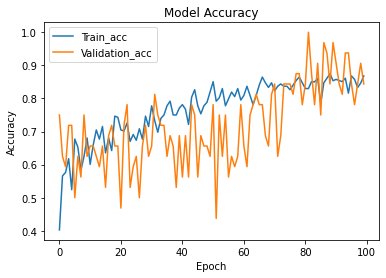

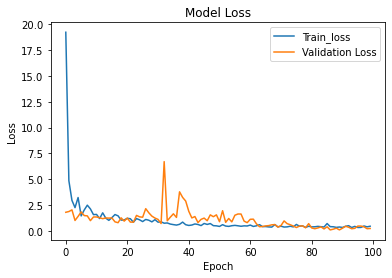

In [27]:


plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Train_acc","Validation_acc"])
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(["Train_loss","Validation Loss"])
plt.show()

